In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info

<bound method DataFrame.info of      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4    

In [5]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4  

In [7]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df1 = df.drop(columns=['Outcome'])
df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


Text(0.5, 0.98, 'Histograms of Diabetes Dataset Features')

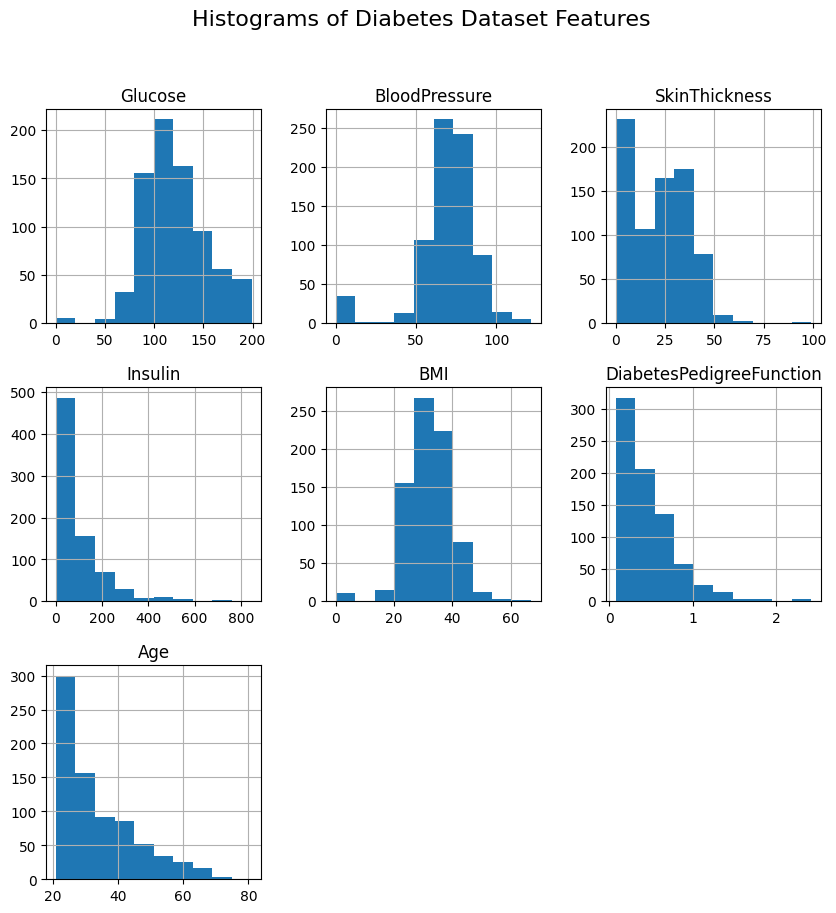

In [9]:
df1.hist(figsize=(10, 10))
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=16)

Text(0.5, 1.0, 'Age vs Insulin')

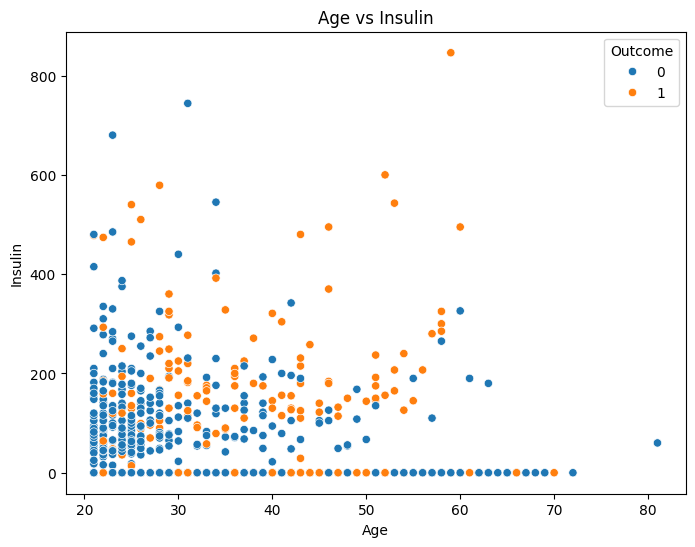

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Insulin', data=df, hue='Outcome')
plt.title('Age vs Insulin')

Text(0.5, 1.0, 'Glucose vs Insulin')

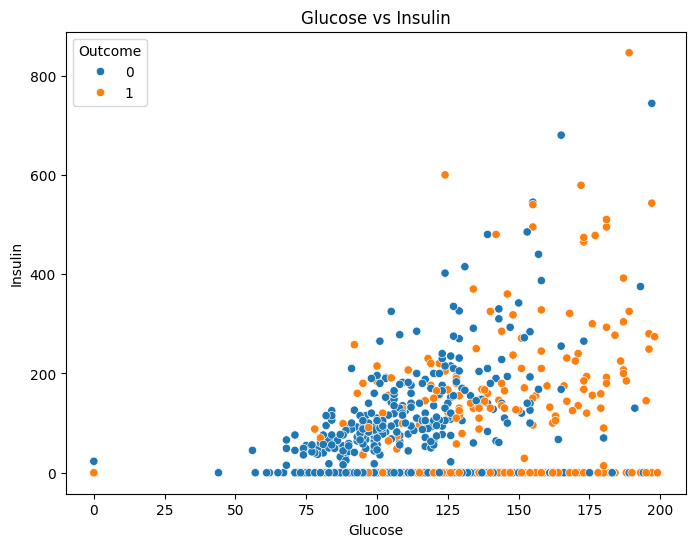

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df, hue='Outcome')
plt.title('Glucose vs Insulin')

Text(0.5, 1.0, 'Glucose vs Age')

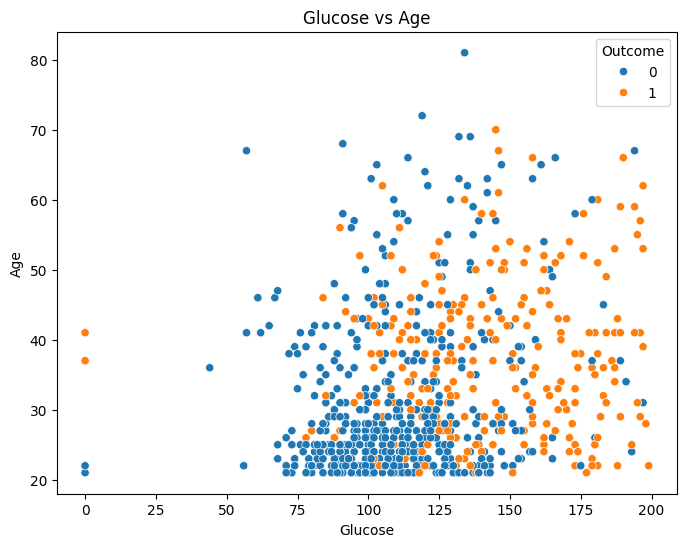

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Age', data=df, hue='Outcome')
plt.title('Glucose vs Age')

Text(0.5, 0.98, 'Pairplot of Diabetes Dataset Features')

<Figure size 300x300 with 0 Axes>

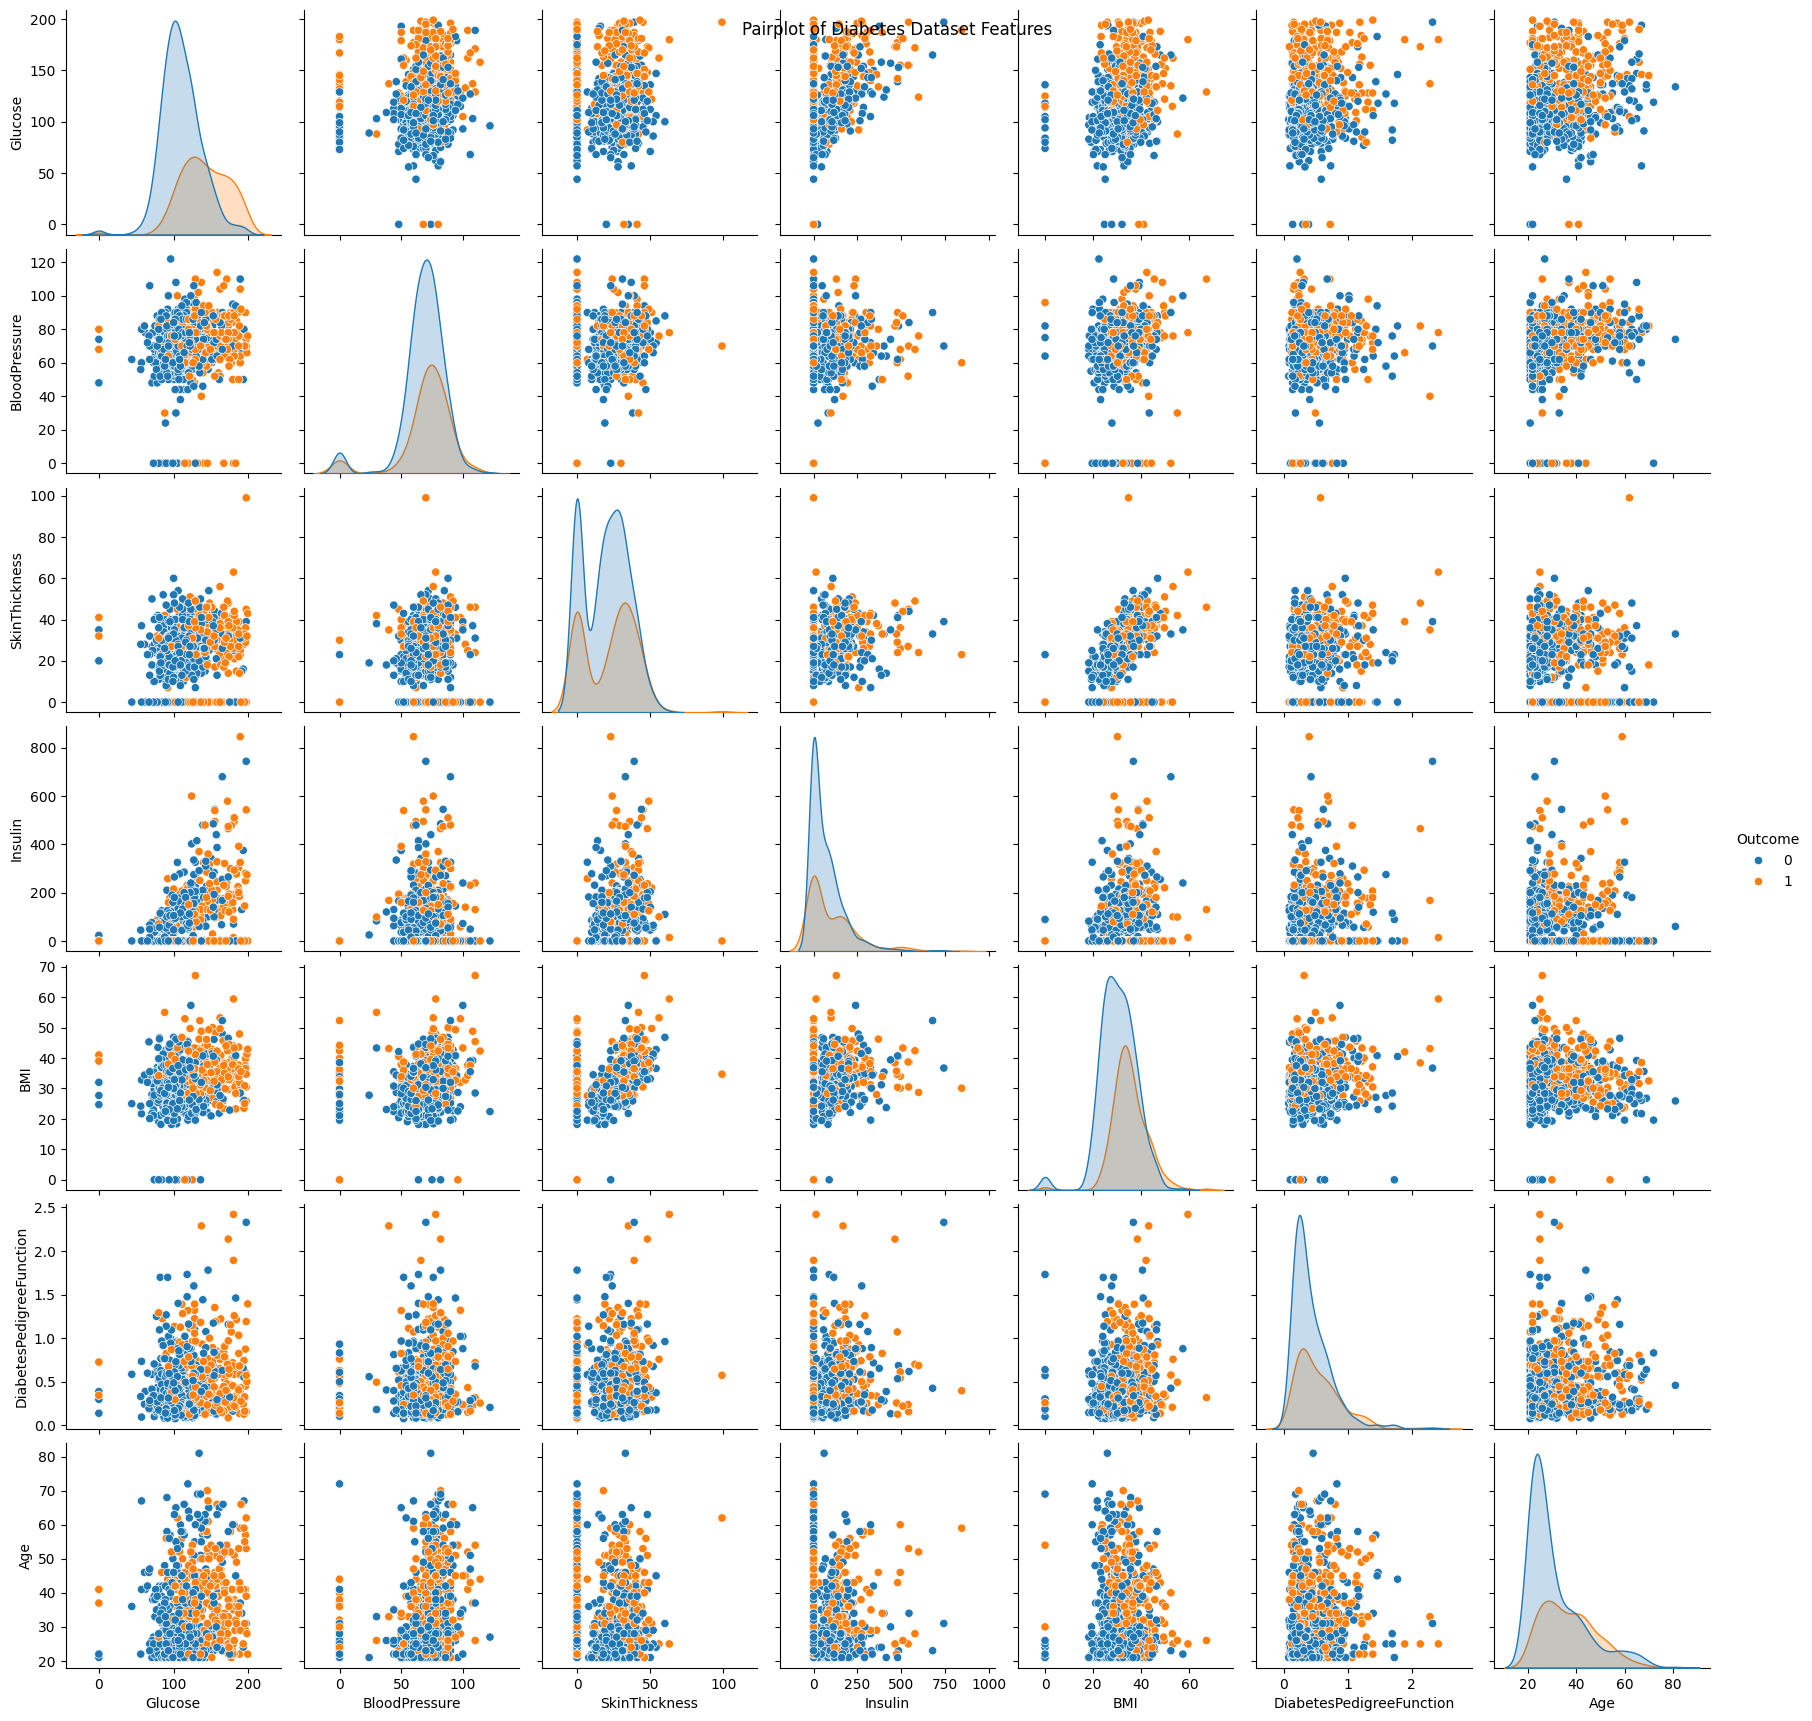

In [13]:
plt.figure(figsize=(3,3))
sns.pairplot(df, hue='Outcome')
plt.suptitle("Pairplot of Diabetes Dataset Features", fontsize=12)

In [14]:
correlation_matrix=df1.corr(numeric_only=True)

Text(0.5, 1.0, 'Correlation Heatmap')

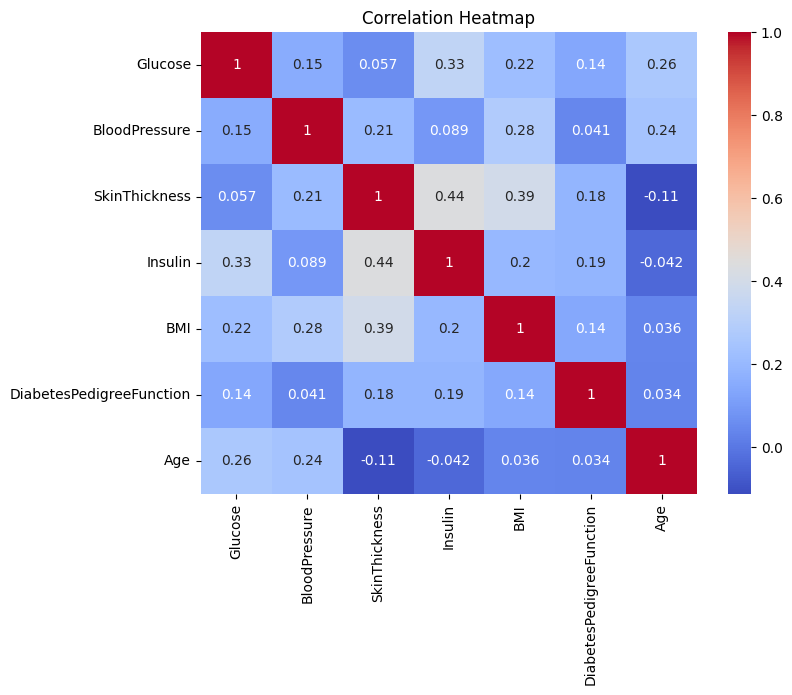

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

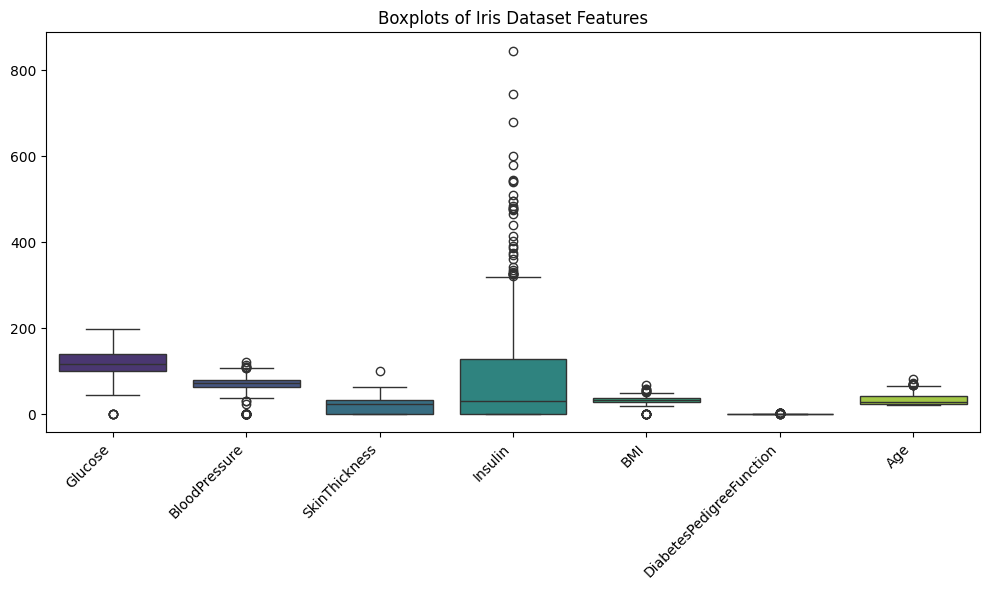

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, palette='viridis') 
plt.title('Boxplots of Iris Dataset Features')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

In [17]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) 
    return df

In [18]:
df1 = handle_outliers(df1 , 'Glucose')
df1 = handle_outliers(df1 , 'BloodPressure')
df1 = handle_outliers(df1 , 'SkinThickness')
df1 = handle_outliers(df1 , 'Insulin')
df1 = handle_outliers(df1 , 'BMI')
df1 = handle_outliers(df1 , 'DiabetesPedigreeFunction')
df1 = handle_outliers(df1 , 'Age')

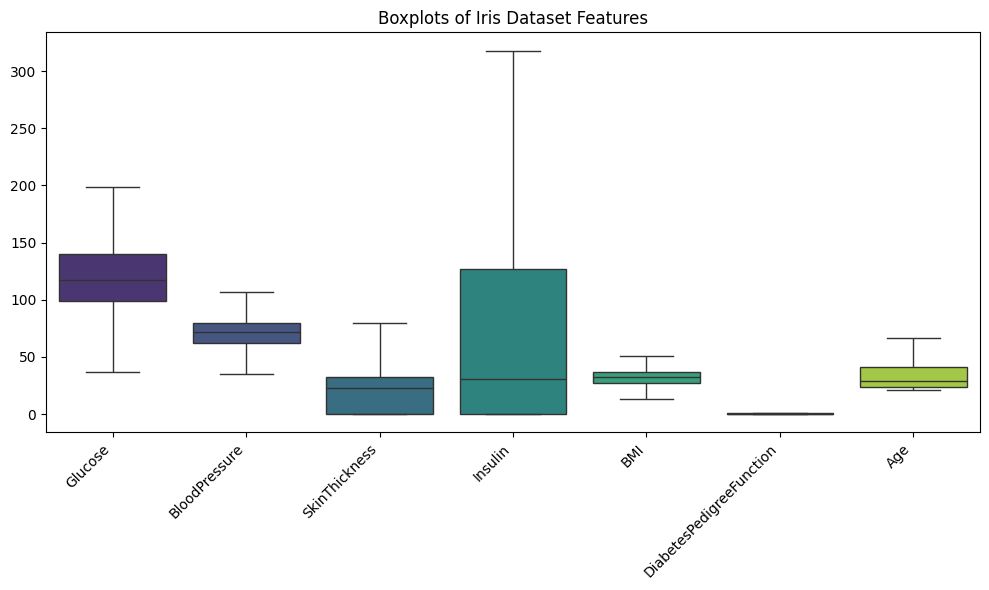

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, palette='viridis') 
plt.title('Boxplots of Iris Dataset Features')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

Text(0.5, 1.0, 'Glucose vs BloodPressure')

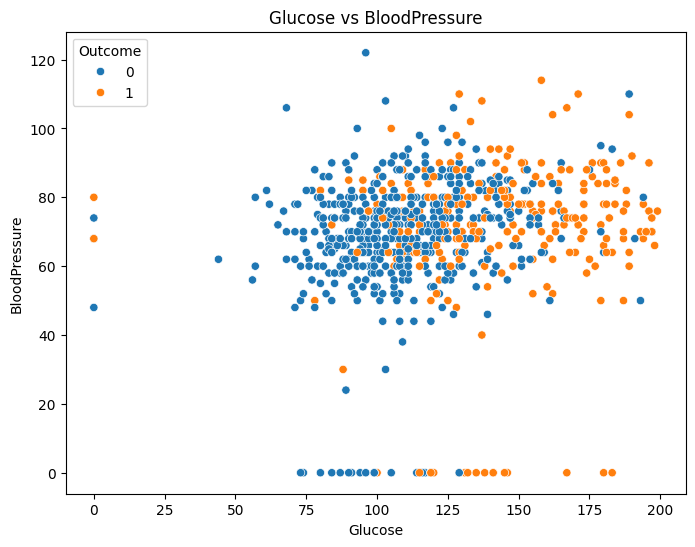

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BloodPressure', data=df, hue='Outcome')
plt.title('Glucose vs BloodPressure')

In [21]:
df['Glucose'].corr(df['BloodPressure']) 

np.float64(0.15258958656866448)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

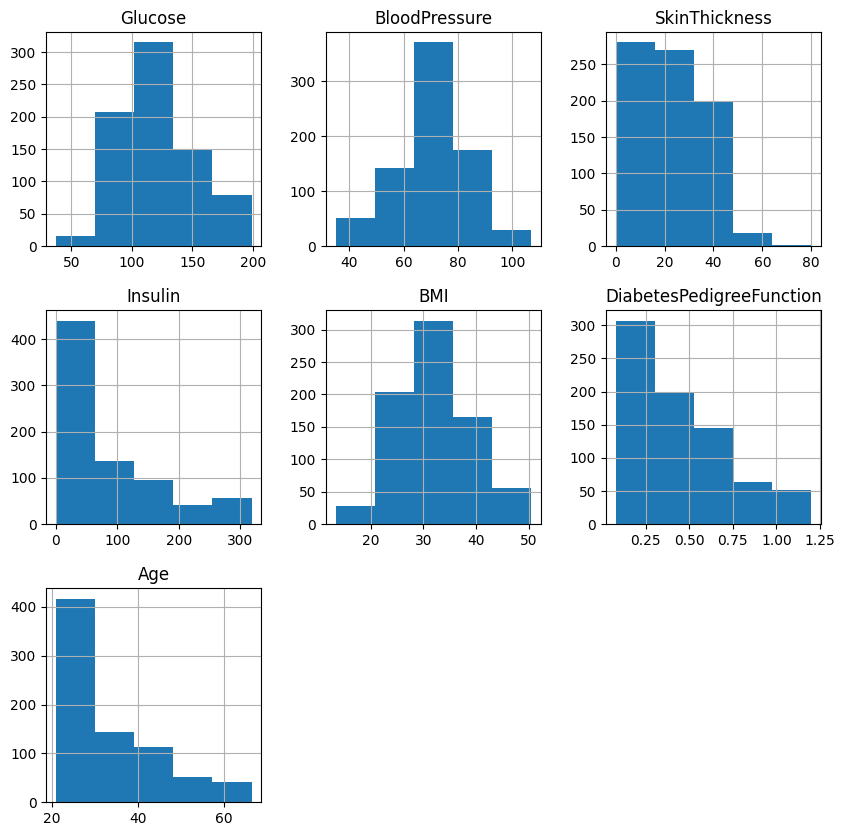

In [22]:
df1.hist(figsize=(10, 10),bins=5)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

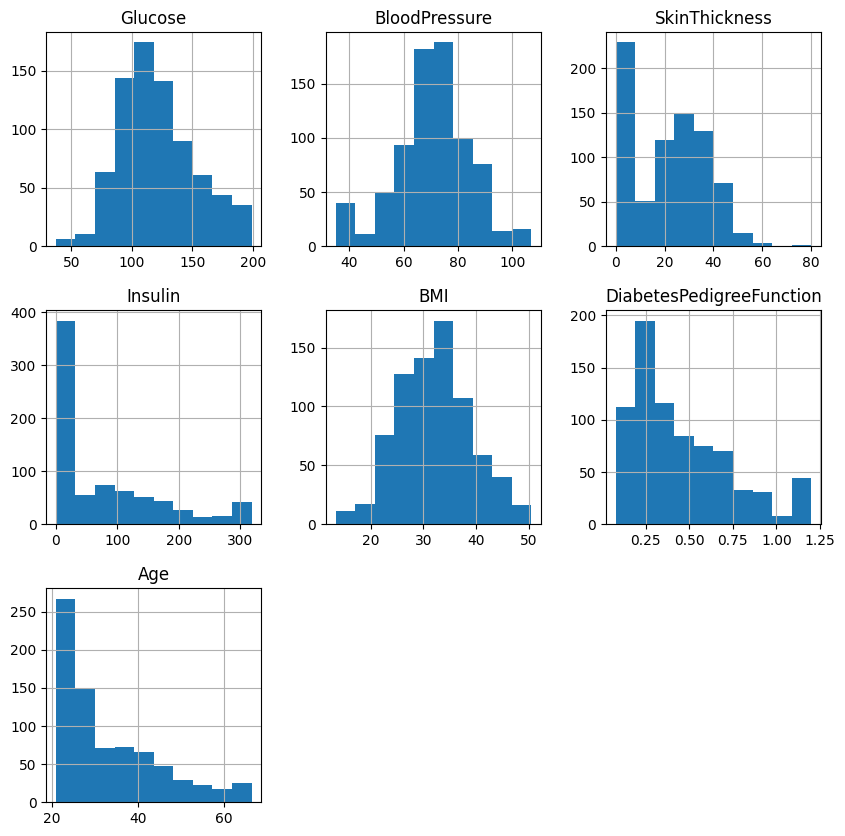

In [23]:
df1.hist(figsize=(10, 10),bins=10)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

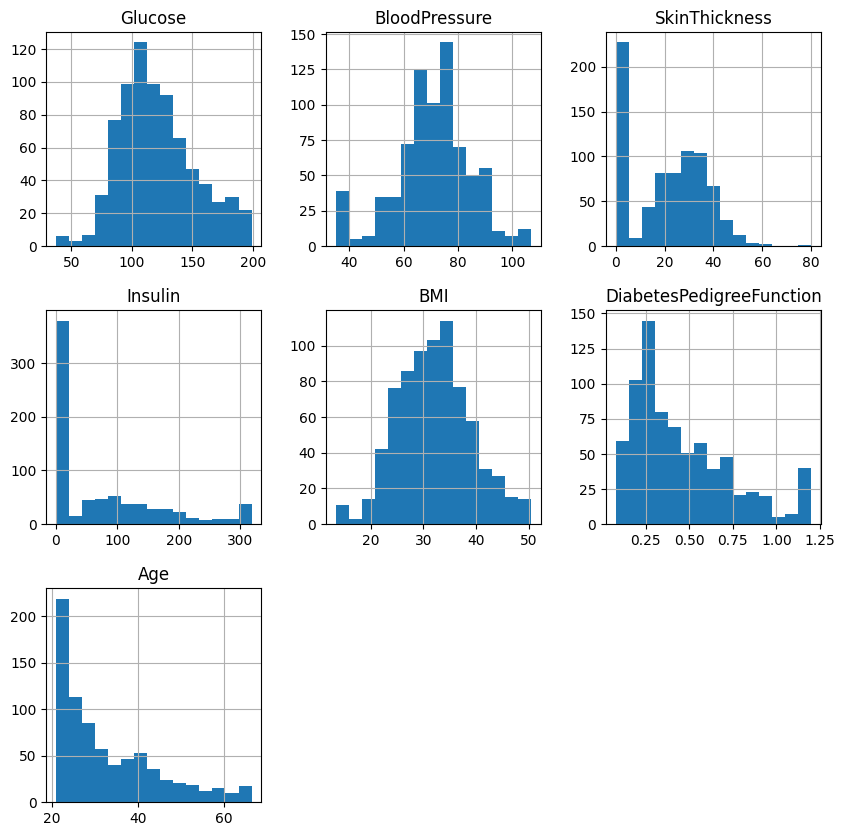

In [24]:
df1.hist(figsize=(10, 10),bins=15)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

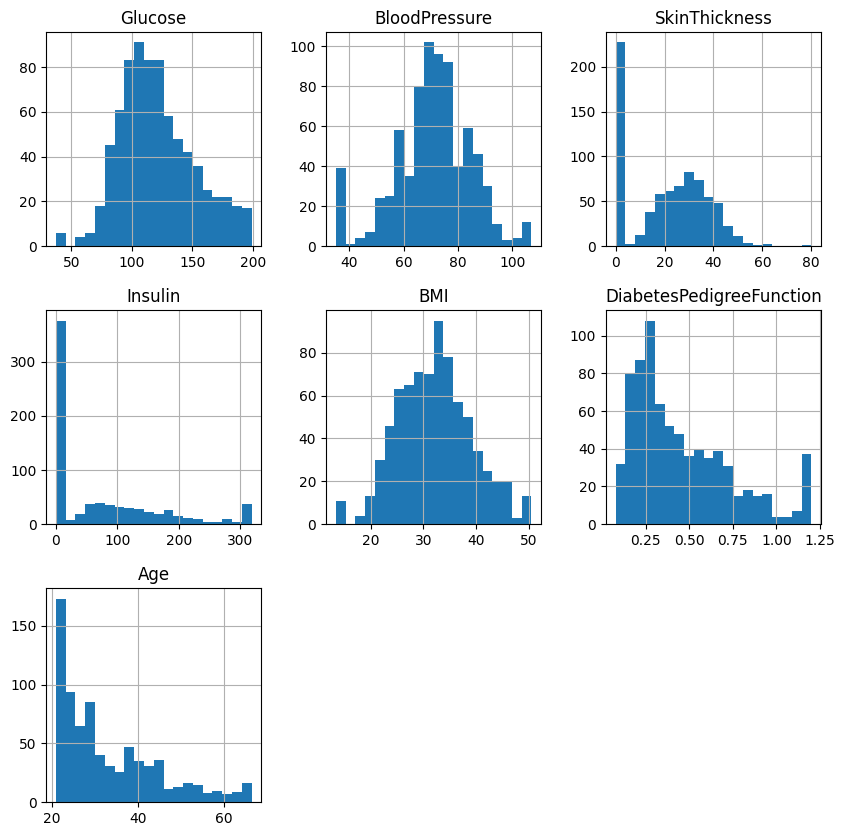

In [25]:
df1.hist(figsize=(10, 10),bins=20)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

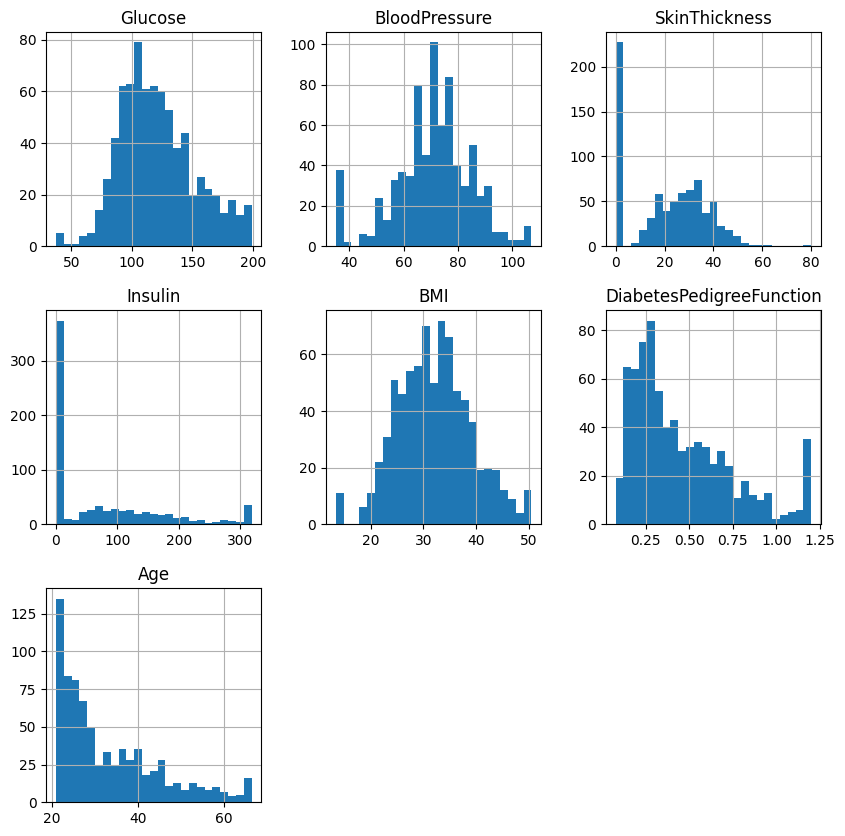

In [26]:
df1.hist(figsize=(10, 10),bins=25)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

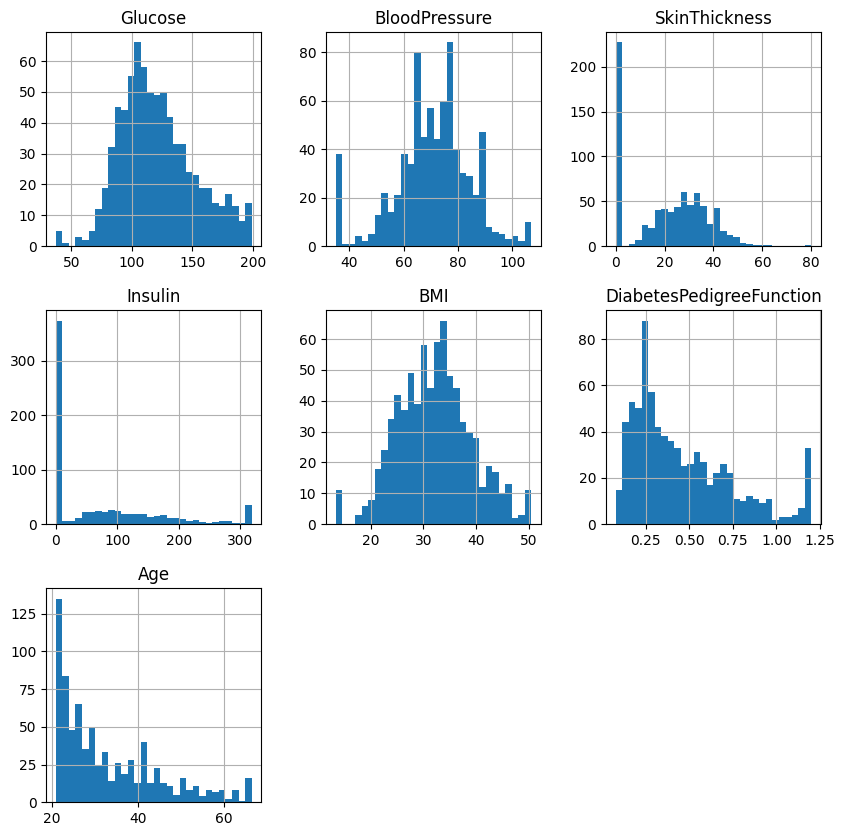

In [27]:
df1.hist(figsize=(10, 10),bins=30)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

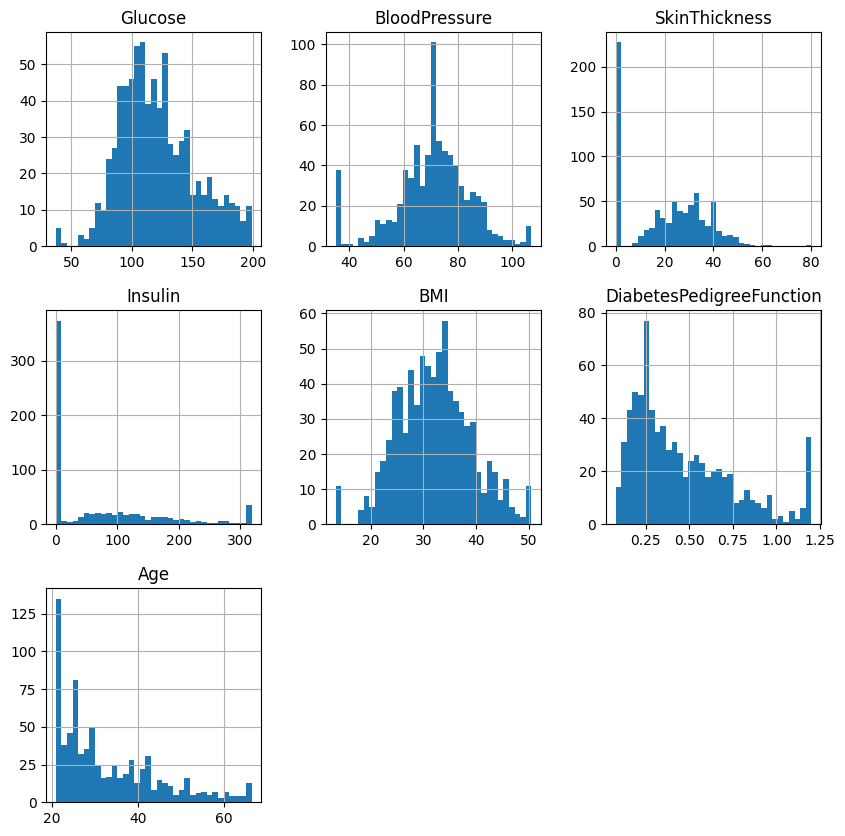

In [28]:
df1.hist(figsize=(10, 10),bins=35)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

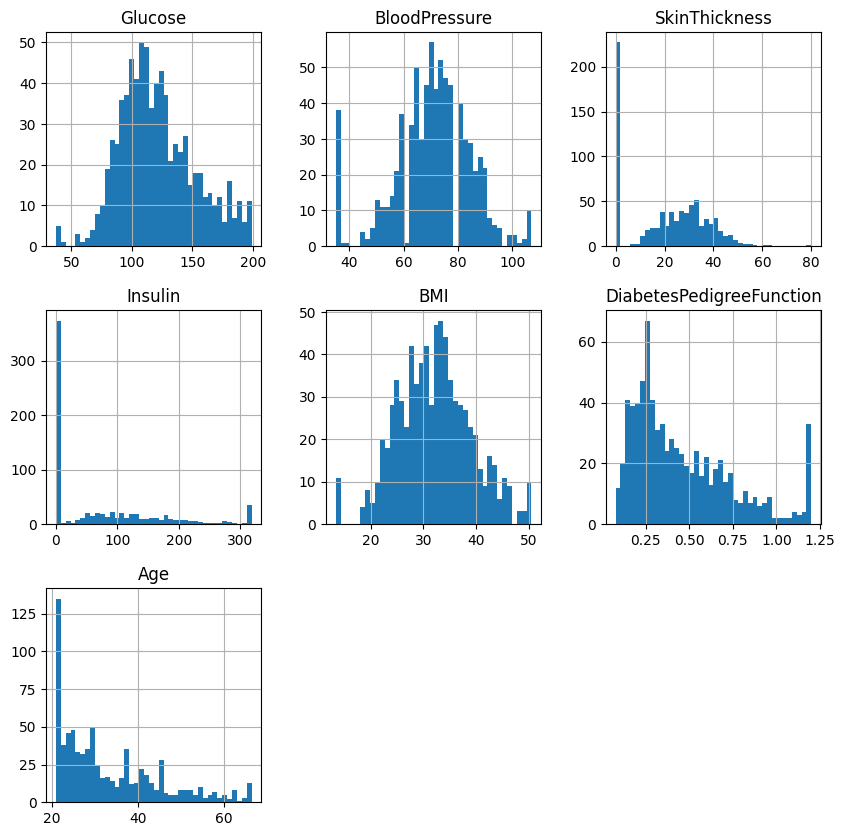

In [29]:
df1.hist(figsize=(10, 10),bins=40)

In [30]:
df.shape

(768, 8)

In [31]:
outcome_0 = df[df['Outcome'] == 0][['Glucose', 'BloodPressure']]
outcome_1 = df[df['Outcome'] == 1][['BMI', 'SkinThickness', 'Insulin']]

print("Outcome = 0: Glucose & BloodPressure")
print(outcome_0.head())

print("\nOutcome = 1: BMI, SkinThickness, Insulin")
print(outcome_1.head())

Outcome = 0: Glucose & BloodPressure
    Glucose  BloodPressure
1        85             66
3        89             66
5       116             74
7       115              0
10      110             92

Outcome = 1: BMI, SkinThickness, Insulin
    BMI  SkinThickness  Insulin
0  33.6             35        0
2  23.3              0        0
4  43.1             35      168
6  31.0             32       88
8  30.5             45      543


In [33]:
insulin_zero_outcomes = df[df['Insulin'] == 0]['Outcome']
insulin_zero_outcomes

0      1
1      0
2      1
5      0
7      0
      ..
761    1
762    0
764    0
766    1
767    0
Name: Outcome, Length: 374, dtype: int64

In [34]:
glucose_g_150 = df[df['Glucose'] > 150][['Age','Outcome']]
glucose_g_150

,Age,Outcome
2,32,1
8,53,1
11,34,1
13,59,1
14,51,1
...,...,...
749,50,1
753,26,1
754,45,1
759,66,1
